In [28]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import HashingVectorizer
#from sklearn.impute import SimpleImputer
from sklearn.preprocessing import Imputer
from matplotlib import pyplot as plt

In [3]:
#Read the data using the Unnamed (probably id) as index
url = 'https://s3.amazonaws.com/drivendata/data/4/public/81e8f2de-9915-4934-b9ae-9705685c9d50.csv'
training = pd.read_csv(url, index_col='Unnamed: 0')

labels = ['Function', 'Object_Type', 'Operating_Status', 'Position_Type', 'Pre_K', 'Reporting', 
          'Sharing', 'Student_Type', 'Use']

numeric = ['FTE', 'Total']

categoric = [ 'Facility_or_Department', 'Function_Description', 
            'Fund_Description', 'Job_Title_Description', 'Location_Description', 
            'Object_Description', 'Position_Extra', 'Program_Description', 'SubFund_Description', 
            'Sub_Object_Description', 
            'Text_1', 'Text_2', 'Text_3', 'Text_4']

## Data cleaning

### Part 1: numeric data
First of all, the numeric columns `FTE` and `Total` must be cleaned. The outliers will be treated as `NaN` values and imputation will be applied to the missing data. <br>
The imputation was made considering the the mean of each `Object_Type` column category, each `NaN` value was imputed with a value depeding on the Object_Type category it belong to, if this information was `NaN` too, then the imput used the mean of `Total` or `FTE` column.

In [4]:
# Remove inconsistent data
training[training['FTE'] < 0] = np.nan
training[training['Total'] < 0] = np.nan

In [6]:
training[training['FTE'] < 0]

,Function,Use,Sharing,Reporting,Student_Type,Position_Type,Object_Type,Pre_K,Operating_Status,Object_Description,...,Sub_Object_Description,Location_Description,FTE,Function_Description,Facility_or_Department,Position_Extra,Total,Program_Description,Fund_Description,Text_1


In [7]:
training['Total'].describe()

count    3.518450e+05
mean     1.696423e+04
std      3.402292e+05
min      0.000000e+00
25%      1.384847e+02
50%      6.696800e+02
75%      4.999610e+03
max      1.297000e+08
Name: Total, dtype: float64

In [8]:
training.groupby('Object_Type')['Total'].mean()

Object_Type
Base Salary/Compensation       24145.844441
Benefits                         865.616621
Contracted Services            38163.380901
Equipment & Equipment Lease    11257.335020
NO_LABEL                       58545.010979
Other Compensation/Stipend      1604.962876
Other Non-Compensation         10646.892470
Rent/Utilities                 46610.910607
Substitute Compensation         1090.501980
Supplies/Materials              7745.381168
Travel & Conferences            1659.440688
Name: Total, dtype: float64

In [9]:
training['Total'].mean()

16964.228335602154

In [10]:
#Imputing data in Total column
def impute_func_total(data):
    if(pd.isnull(data['Object_Type'])):
        return 16964
    if(pd.isnull(data['Total'])):        
        if(data['Object_Type'] == 'Base Salary/Compensation'):
            return 24146
        if(data['Object_Type'] == 'Benefits'):
            return 38163
        if(data['Object_Type'] == 'Contracted Services'):
            return 24146
        if(data['Object_Type'] == 'Equipment & Equipment Lease'):
            return 11257
        if(data['Object_Type'] == 'NO_LABEL'):
            return 58545
        if(data['Object_Type'] == 'Other Compensation/Stipend'):
            return 1605
        if(data['Object_Type'] == 'Other Non-Compensation'):
            return 10646
        if(data['Object_Type'] == 'Rent/Utilities'):
            return 46611
        if(data['Object_Type'] == 'Substitute Compensation'):
            return 1090
        if(data['Object_Type'] == 'Supplies/Materials'):
            return 7745
        if(data['Object_Type'] == 'Travel & Conferences'):
            return 1659
    else:
        return data['Total']

In [11]:
training['Total'] = training.apply(impute_func_total, axis = 1)

In [5]:
training['FTE'].describe()

count    125849.000000
mean          0.427436
std           0.573810
min           0.000000
25%           0.001078
50%           0.133337
75%           1.000000
max          46.800000
Name: FTE, dtype: float64

In [17]:
#Put FET data greater than 1 in percentage 
mask = training['FTE'] > 1
df_ToAtt = training[mask]

training.loc[mask, 'FTE'] = df_ToAtt['FTE'].div(100)

In [19]:
training['FTE'].describe()

count    125849.000000
mean          0.397216
std           0.446708
min           0.000000
25%           0.001078
50%           0.080819
75%           1.000000
max           1.000000
Name: FTE, dtype: float64

In [20]:
training.groupby('Object_Type')['FTE'].mean()

Object_Type
Base Salary/Compensation       0.457632
Benefits                       0.000000
Contracted Services            0.000000
Equipment & Equipment Lease    0.000000
NO_LABEL                       0.748446
Other Compensation/Stipend     0.000107
Other Non-Compensation         0.000000
Rent/Utilities                 0.000000
Substitute Compensation        0.000059
Supplies/Materials             0.000000
Travel & Conferences           0.000000
Name: FTE, dtype: float64

In [21]:
training['FTE'].mean()

0.397215825398393

In [22]:
#Imputing data in FTE column
def impute_func_FTE(data):
    if(pd.isnull(data['Object_Type'])):
        return 0.40
    if(pd.isnull(data['FTE'])):        
        if(data['Object_Type'] == 'Base Salary/Compensation'):
            return 0.45
        if(data['Object_Type'] == 'Benefits'):
            return 0.0
        if(data['Object_Type'] == 'Contracted Services'):
            return 0.0
        if(data['Object_Type'] == 'Equipment & Equipment Lease'):
            return 0.0
        if(data['Object_Type'] == 'NO_LABEL'):
            return 0.75
        if(data['Object_Type'] == 'Other Compensation/Stipend'):
            return 0.000107
        if(data['Object_Type'] == 'Other Non-Compensation'):
            return 0.0
        if(data['Object_Type'] == 'Rent/Utilities'):
            return 0.0
        if(data['Object_Type'] == 'Substitute Compensation'):
            return 0.000059
        if(data['Object_Type'] == 'Supplies/Materials'):
            return 0.0
        if(data['Object_Type'] == 'Travel & Conferences'):
            return 0.0
    else:
        return data['FTE']

In [23]:
training['FTE'] = training.apply(impute_func_FTE, axis = 1)

In [24]:
training[numeric].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 400277 entries, 134338 to 415831
Data columns (total 2 columns):
FTE      400277 non-null float64
Total    400277 non-null float64
dtypes: float64(2)
memory usage: 9.2 MB


**Numeric data distribution after pre processing**

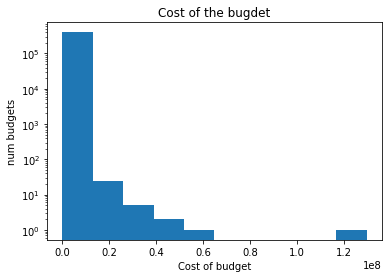

In [29]:
plt.hist(training['Total'], log=True)

# Add title and labels
plt.title('Cost of the bugdet')
plt.xlabel('Cost of budget')
plt.ylabel('num budgets')

plt.show()

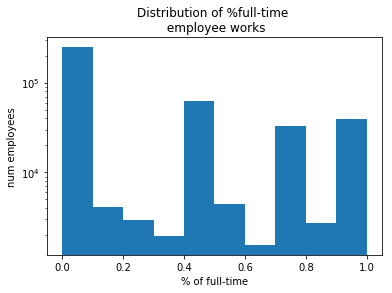

In [33]:
%matplotlib inline
plt.hist(training['FTE'],  bins=10, log = True)

# Add title and labels
plt.title('Distribution of %full-time \n employee works')
plt.xlabel('% of full-time')
plt.ylabel('num employees')

plt.show()

### Part 2: Categoric data

The strings must be normalized: symbols removed, all letters to lower case. Then, they can be transformed to numeric data.

In [8]:
for category in categoric:
    training[category] = training[category].str.lower()

In [9]:
#Check if the unique values decrease
training[categoric].nunique(dropna=False)

Facility_or_Department     176
Function_Description       655
Fund_Description           141
Job_Title_Description     3455
Location_Description       352
Object_Description         570
Position_Extra             580
Program_Description        418
SubFund_Description        267
Sub_Object_Description     159
Text_1                    1389
Text_2                     279
Text_3                      35
Text_4                     240
dtype: int64

In [18]:
#Convert columns
training[categoric] = training[categoric].apply(lambda x: x.astype('object'), axis = 0)

In [19]:
training[categoric].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 400277 entries, 134338 to 415831
Data columns (total 14 columns):
Facility_or_Department    53186 non-null object
Function_Description      298676 non-null object
Fund_Description          179157 non-null object
Job_Title_Description     272317 non-null object
Location_Description      155504 non-null object
Object_Description        332143 non-null object
Position_Extra            244180 non-null object
Program_Description       280943 non-null object
SubFund_Description       263731 non-null object
Sub_Object_Description    70748 non-null object
Text_1                    251891 non-null object
Text_2                    87431 non-null object
Text_3                    108613 non-null object
Text_4                    53384 non-null object
dtypes: object(14)
memory usage: 45.8+ MB


Before removing symbols, let's take a peek on some values and so we can detect the diferrences later


In [20]:
some_functions = training['Function_Description'].value_counts(normalize=True) > 0.05
some_functions.head(6)

non-project                        True
instruction                        True
unalloc budgets/schools            True
basic (fefp k-12)                 False
employee retirement               False
ela e-teaching sheltered eng      False
Name: Function_Description, dtype: bool

In [21]:
# Remove symbols
'''for category in categoric:
    training[category] = training[category].str.replace(r"[&/\)('\"-.,]","")'''
vec = HashingVectorizer(token_pattern="[A-Za-z0-9]+(?=\\s+)", ngram_range=(1,2))

In [22]:
training['Function_Description'].value_counts(normalize=True).head(6)

non-project                       0.191686
instruction                       0.128882
unalloc budgets/schools           0.055458
basic (fefp k-12)                 0.044473
employee retirement               0.043723
ela e-teaching sheltered eng      0.021093
Name: Function_Description, dtype: float64

In [23]:
training[categoric] = training[categoric].fillna("")

In [24]:
training['Function_Description'].isnull().sum()

0

In [29]:
# Join all text items in a row that have a space in between
text_data = training[categoric].apply(lambda x: " ".join(x), axis = 1)

In [31]:
text_data

134338      general fund teacher-elementary    kindergar...
206341     rgn  gob  (blank)  contractor services undesi...
326408      general purpose school tcher 2nd grade  pers...
364634     unalloc budgets/schools  teacher, short term ...
47683      non-project  teacher, secondary (high)   teac...
229958                                                     
417668      local fund   educational supplies and materi...
126378     non-project  sub manager, food service  distr...
275539     ela s - teaching spanish only  teacher, eleme...
85262      unalloc budgets/schools  teacher,retrd shrt t...
304569                                                     
330504     instruction general fund   supplies  primary ...
84272     position control pools  general purpose school...
64760                                                      
21870      basic (fefp k-12)              conversion cha...
18698     all campus payroll instruction general operati...
169454     basic (fefp k-12)            

In [36]:
hec = HashingVectorizer(token_pattern="[A-Za-z0-9]+(?=\\s+)", norm=None, binary=False,
                                                     ngram_range=(1,2))
hashed_text = hec.fit_transform(text_data)

In [35]:
hashed_df = pd.DataFrame(hashed_text.data)
print(hashed_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5221742 entries, 0 to 5221741
Data columns (total 1 columns):
0    float64
dtypes: float64(1)
memory usage: 39.8 MB
None


In [37]:
hashed_df

,0
0,0.377964
1,0.755929
2,0.377964
3,0.377964
4,0.182574
5,-0.182574
6,-0.182574
7,-0.365148
8,0.182574
9,0.182574


## Intro to Neural Network

In [71]:
from sklearn.model_selection import train_test_split
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dense
from tensorflow.python.keras.optimizers import SGD

In [25]:
numeric_data = training[numeric]

In [9]:
imp = Imputer(missing_values='NaN', strategy='mean', axis=0)

In [28]:
#Simple imputations
numeric_data[['FTE']] = imp.fit(numeric_data[['FTE']]).transform(numeric_data[['FTE']])

/home/danielmarx/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/home/danielmarx/anaconda3/lib/python3.6/site-packages/pandas/core/frame.py:3141: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.loc._setitem_with_indexer((slice(None), indexer), value)
/home/danielmarx/anaconda3/lib/python3.6/site-packages/pandas/core/frame.py:3113: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pa

In [29]:
numeric_data[['Total']] = imp.fit(numeric_data[['Total']]).transform(numeric_data[['Total']])

/home/danielmarx/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/home/danielmarx/anaconda3/lib/python3.6/site-packages/pandas/core/frame.py:3141: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.loc._setitem_with_indexer((slice(None), indexer), value)
/home/danielmarx/anaconda3/lib/python3.6/site-packages/pandas/core/frame.py:3113: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pa

In [30]:
numeric_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 400277 entries, 134338 to 415831
Data columns (total 2 columns):
FTE      400277 non-null float64
Total    400277 non-null float64
dtypes: float64(2)
memory usage: 19.2 MB


In [32]:
numeric_data.describe()

,FTE,Total
count,400277.000000,4.002770e+05
mean,0.427436,1.696423e+04
std,0.321745,3.189825e+05
min,0.000000,0.000000e+00
25%,0.427436,1.747800e+02
50%,0.427436,1.046583e+03
75%,0.427436,1.696423e+04
max,46.800000,1.297000e+08


In [33]:
df_dummies = pd.get_dummies(training[labels])

In [34]:
df_dummies.head()

,Function_Aides Compensation,Function_Career & Academic Counseling,Function_Communications,Function_Curriculum Development,Function_Data Processing & Information Services,Function_Development & Fundraising,Function_Enrichment,Function_Extended Time & Tutoring,Function_Facilities & Maintenance,Function_Facilities Planning,...,Student_Type_Special Education,Student_Type_Unspecified,Use_Business Services,Use_ISPD,Use_Instruction,Use_Leadership,Use_NO_LABEL,Use_O&M,Use_Pupil Services & Enrichment,Use_Untracked Budget Set-Aside
134338,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
206341,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
326408,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,1,0,0,0,0,0
364634,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,1,0,0,0,0,0
47683,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,1,0,0,0,0,0


In [50]:
df_dummies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 400277 entries, 134338 to 415831
Columns: 104 entries, Function_Aides Compensation to Use_Untracked Budget Set-Aside
dtypes: uint8(104)
memory usage: 52.8 MB


In [43]:
X_train, X_test, y_train, y_test = train_test_split(numeric_data,
                                                    df_dummies,
                                                    test_size=0.2, 
                                                    random_state=42)

In [44]:
X_train

,FTE,Total
444691,0.427436,218.450000
250816,0.427436,3126.332668
393405,0.427436,674.710000
299533,0.427436,286.688429
357445,0.427436,221.843840
67965,0.427436,16964.228336
327481,0.427436,775.291920
81419,0.427436,16964.228336
397760,1.000000,18309.289661
426528,0.427436,525.670000


In [45]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

In [46]:
X_train

array([[-4.88841566e-04, -4.97323999e-02],
       [-4.88841566e-04, -4.12037278e-02],
       [-4.88841566e-04, -4.83942125e-02],
       ...,
       [ 1.72325784e+00,  2.56424286e-01],
       [-4.88841566e-04, -6.17882959e-04],
       [-4.88841566e-04, -2.04407137e-02]])

In [ ]:
model = Sequential()
model.add(Dense(32, activation='relu', input_dim=100))
model.add(Dense(10, activation='softmax'))
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Generate dummy data
import numpy as np
data = np.random.random((1000, 100))
labels = np.random.randint(10, size=(1000, 1))

# Convert labels to categorical one-hot encoding
one_hot_labels = keras.utils.to_categorical(labels, num_classes=10)

# Train the model, iterating on the data in batches of 32 samples
model.fit(data, one_hot_labels, epochs=10, batch_size=32)

In [82]:
# Initialising the ANN
classifier = Sequential()

# Adding the input layer and the first hidden, the hidden layer number is (104 + 2)/2
classifier.add(Dense(53, activation = 'relu', input_dim = 2))

# Adding the output layer
classifier.add(Dense(104, activation = 'softmax'))

In [83]:
# Compiling the ANN
classifier.compile(optimizer= "rmsprop",
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Fitting the ANN to the Training set
#classifier.fit(X_train, y_train, batch_size = 10, epochs = 20)

TypeError: __init__() got an unexpected keyword argument 'read_only_collections'

In [ ]:
#Making predictions and evaluating the model

# Predicting the Test set results
y_pred = classifier.predict(X_test)